## Predicting the sale Price of Bulldozers using Machine Learning

In this notebook we are going to go through example machine learning project with the goal of predicting the 
sale price of bulldozers.

## 1. Problem Definition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of
 how much similar bulldozers have been sold for?
 
 ## 2. Data
 
 The data is downloaded from kaggel Bluebook for Bulldozers competition:https://www.kaggle.com/competitions/bluebook-for-bulldozers/data
 
 There are 3 main datasets:
 
* Train.csv is the train set, which contain data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make prediction on this
  set throughout the majority of the competition. Your score on this is used to create the public leaderboard.
* Test.csv is the test set, which won't be released untill the last week of the competition. It contains data
  from may 1, 2012 - November 2012. Your Score on the test set determines your final rank for the competition
  
## 3. Evaluation

The evaluation metric for this competition is the RMSLE (Root mean squared log error) between the actual and predicted auction prices
ttps://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation
 

**Note** The goal for most regression evaluation metrics is to minimizw the error. For example, our goal for this project will be to build a machine learning  model which minimises RMSLE. 

## 4. Features

Kaggle provides the dictionary detailing all the features of the dataset. got it downloaded already 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
#  Import training and validation set
df = pd.read_csv('TrainAndValid.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
SalesID                     412698 non-null int64
SalePrice                   412698 non-null float64
MachineID                   412698 non-null int64
ModelID                     412698 non-null int64
datasource                  412698 non-null int64
auctioneerID                392562 non-null float64
YearMade                    412698 non-null int64
MachineHoursCurrentMeter    147504 non-null float64
UsageBand                   73670 non-null object
saledate                    412698 non-null object
fiModelDesc                 412698 non-null object
fiBaseModel                 412698 non-null object
fiSecondaryDesc             271971 non-null object
fiModelSeries               58667 non-null object
fiModelDescriptor           74816 non-null object
ProductSize                 196093 non-null object
fiProductClassDesc          412698 non-null object
state                      

In [4]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

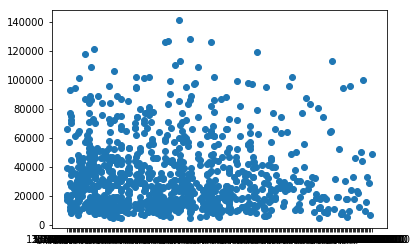

In [7]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

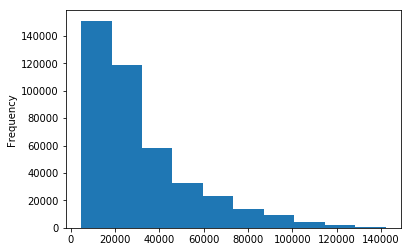

In [8]:
df.SalePrice.plot.hist()

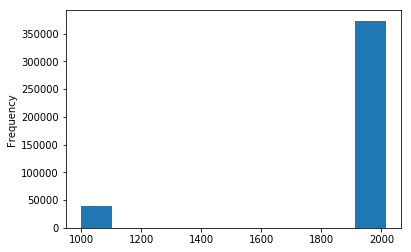

In [9]:
df.YearMade.plot.hist()

### Parsing Dates

When dealing with time series data, we want to enrich the time and date component as much as possible

We can do that by telling pandas which of our columns has date in it using the 'parse_dates' parameter.

In [12]:
# Import data again but this time parse date
df = pd.read_csv('TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])

In [13]:
df.saledate.dtype

dtype('<M8[ns]')

In [14]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
5     2008-12-18
6     2004-08-26
7     2005-11-17
8     2009-08-27
9     2007-08-09
10    2008-08-21
11    2006-08-24
12    2005-10-20
13    2006-01-26
14    2006-01-03
15    2006-11-16
16    2007-06-14
17    2010-01-28
18    2006-03-09
19    2005-11-17
20    2006-05-18
21    2006-10-19
22    2007-10-25
23    2006-10-19
24    2004-05-20
25    2006-03-09
26    2006-03-09
27    2007-02-22
28    2007-08-09
29    2006-06-01
         ...    
970   2006-03-09
971   2007-12-06
972   2007-03-22
973   2004-02-12
974   2009-08-06
975   2004-01-29
976   2006-11-02
977   2011-07-07
978   2007-10-04
979   2007-11-15
980   2006-06-15
981   2006-01-26
982   2006-04-20
983   2006-02-23
984   2005-07-28
985   2005-05-19
986   2004-01-29
987   2006-11-07
988   2005-12-15
989   2009-08-28
990   2006-05-04
991   2005-09-22
992   2009-04-16
993   2007-12-06
994   2010-08-20
995   2009-07-16
996   2007-06-14
997   2005-09-

In [15]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

## Sort dataframe by saledate 

When working with time series data, its good idea to sort it by date

In [17]:
# Sort DataFrame in date order
df.sort_values(by=['saledate'], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Make a copy of the original DataFrame

We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.

In [18]:
# Make a copy

df_copy = df.copy()

In [19]:
df_copy.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [20]:
df_copy.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


### Add datetime parameters for saledate column

In [21]:
df_copy[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int64

In [22]:
df_copy[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int64

In [23]:
df_copy[:2].saledate

205615   1989-01-17
274835   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [24]:
df_copy['saleYear'] = df_copy.saledate.dt.year
df_copy['saleMonth'] = df_copy.saledate.dt.month
df_copy['saleDay'] = df_copy.saledate.dt.day
df_copy['saleDayOfWeek'] = df_copy.saledate.dt.dayofweek
df_copy['saleDayOfYear'] = df_copy.saledate.dt.dayofyear

In [25]:
df_copy.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [26]:
# Now we can remove saledate since we alread enrich our dataframe date time features
df_copy.drop('saledate', axis=1, inplace=True)

In [27]:
df_copy.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [28]:
df_copy.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## Modelling

Lets do some model-driven EDA

In [29]:
df_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [ ]:
# Lets buuld a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

model.fit(df_copy.drop('SalePrice', axis=1), df_copy['SalePrice']) # This won't work bc we need to convert. Not running it

In [30]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
SalesID                     412698 non-null int64
SalePrice                   412698 non-null float64
MachineID                   412698 non-null int64
ModelID                     412698 non-null int64
datasource                  412698 non-null int64
auctioneerID                392562 non-null float64
YearMade                    412698 non-null int64
MachineHoursCurrentMeter    147504 non-null float64
UsageBand                   73670 non-null object
fiModelDesc                 412698 non-null object
fiBaseModel                 412698 non-null object
fiSecondaryDesc             271971 non-null object
fiModelSeries               58667 non-null object
fiModelDescriptor           74816 non-null object
ProductSize                 196093 non-null object
fiProductClassDesc          412698 non-null object
state                       412698 non-null object
ProductGroup          

In [31]:
df_copy['UsageBand'].dtype

dtype('O')

In [32]:
df_copy.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Convert strings to categories

one way we can turn all our data into numbers is by converting them into pandas categories

In [33]:
pd.api.types.is_string_dtype(df_copy['UsageBand'])

True

In [34]:
# Find the columns which contain strings
for label, content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [35]:
# Example of df.items
random_dict = {'key': 'hello', 'key2': 'world'}

for key, value in random_dict.items():
    print(f'this is a key: {key}', f'this is a value: {value}')

this is a key: key this is a value: hello
this is a key: key2 this is a value: world


In [36]:
# This will turn all the string values into category values
for label, content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        df_copy[label] = content.astype('category').cat.as_ordered()

In [37]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
SalesID                     412698 non-null int64
SalePrice                   412698 non-null float64
MachineID                   412698 non-null int64
ModelID                     412698 non-null int64
datasource                  412698 non-null int64
auctioneerID                392562 non-null float64
YearMade                    412698 non-null int64
MachineHoursCurrentMeter    147504 non-null float64
UsageBand                   73670 non-null category
fiModelDesc                 412698 non-null category
fiBaseModel                 412698 non-null category
fiSecondaryDesc             271971 non-null category
fiModelSeries               58667 non-null category
fiModelDescriptor           74816 non-null category
ProductSize                 196093 non-null category
fiProductClassDesc          412698 non-null category
state                       412698 non-null category
Prod

In [38]:
df_copy.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [39]:
# The states have been converted to categories here
df_copy.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
54653      8
81383      8
204924     8
135376     8
113390     8
113394     8
116419     8
32138      8
127610     8
76171      8
127000     8
128130     8
127626     8
55455      8
55454      8
144032     8
54438      9
144952     8
205752     8
28927      9
86971      8
67034      8
87602      8
53101      8
205784     8
          ..
407382     4
405913     4
405915     4
411423     4
412544     4
409901     4
405777     4
411889     4
409896     4
411890     4
406079     4
409783     4
411522     4
412218     4
411527     4
406092     4
409780     4
406167     4
411334     4
412164     4
409202     4
408976     4
411695     4
411319     4
408889     4
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

We now have a way to access all our data in form of numbers

but we still have a bunch of missing numbers...

In [40]:
# Check missing data
df_copy.isna().sum()/len(df_copy)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

## Save preprocessed data 

In [41]:
# Export current copy to dataframe
df_copy.to_csv('copy_trainsets.csv', index=False)

In [42]:
# import preprocessed data
df_copy = pd.read_csv('copy_trainsets.csv', low_memory=False)
df_copy.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


## Fill missing values

### Fill numeric missing values first

In [43]:
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [44]:
# check for which numeric columns have no values
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [45]:
# Fill numeric rows with the median
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary colun which tells us if the data was missing or not
            df_copy[label+'is_missing'] = pd.isnull(content)
            # Fill missing numeric values with median
            df_copy[label] = content.fillna(content.median()) # median is more robust 

In [46]:
# check if there is any null numeric values
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [47]:
# check to see how many samples were missing
df_copy.auctioneerIDis_missing.value_counts()

False    392562
True      20136
Name: auctioneerIDis_missing, dtype: int64

In [48]:
df_copy.isna().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                             339028
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                       140727
fiModelSeries                         354031
fiModelDescriptor                     337882
ProductSize                           216605
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                          305611
Enclosure                                334
Forks                                 214983
Pad_Type  

## Filling and turning categorical variables into numbers

In [49]:
# check for columns which aren't numeric
for label, content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [50]:
# Turn categorical variables into numbers and fill missing
for label, content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary colun which tells us if the data was missing or not
        df_copy[label+'is_missing'] = pd.isnull(content)
        # Fill missing numeric values and add +1
        df_copy[label] = pd.Categorical(content).codes+1

In [51]:
pd.Categorical(df_copy['state']).codes + 1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [52]:
pd.Categorical(df_copy['UsageBand']).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [53]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [54]:
df_copy.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0,0,0,0,0
UsageBand,0,0,0,0,0
fiModelDesc,4593,1820,2348,1819,2119


In [55]:
df_copy.isna().sum()

SalesID                              0
SalePrice                            0
MachineID                            0
ModelID                              0
datasource                           0
auctioneerID                         0
YearMade                             0
MachineHoursCurrentMeter             0
UsageBand                            0
fiModelDesc                          0
fiBaseModel                          0
fiSecondaryDesc                      0
fiModelSeries                        0
fiModelDescriptor                    0
ProductSize                          0
fiProductClassDesc                   0
state                                0
ProductGroup                         0
ProductGroupDesc                     0
Drive_System                         0
Enclosure                            0
Forks                                0
Pad_Type                             0
Ride_Control                         0
Stick                                0
Transmission             

Now that all our data is numeric as well as dataframe has no missing values, we should be able to 
build a machine learning model.

In [56]:
df_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [ ]:
%%time
# Lets buuld a machine learning model
from sklearn.ensemble import RandomForestRegressor

# Instatiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

model.fit(df_copy.drop('SalePrice', axis=1), df_copy['SalePrice'])

# This code took Wall time: 9min 23s to execute and we are fitting on a train data

In [ ]:
# Score the model
model.score(df_copy.drop('SalePrice', axis=1), df_copy['SalePrice'])
# The result for this line is: 0.9875468079970562 and we scored the train dataset not the test dataset

**Question**: why doesn't the above metric hold water or why is it not reliable

## Splitting data into train/validation sets

In [57]:
df_copy.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
5         1989
6         1989
7         1989
8         1989
9         1989
10        1989
11        1989
12        1989
13        1989
14        1989
15        1989
16        1989
17        1989
18        1989
19        1989
20        1989
21        1989
22        1989
23        1989
24        1989
25        1989
26        1989
27        1989
28        1989
29        1989
          ... 
412668    2012
412669    2012
412670    2012
412671    2012
412672    2012
412673    2012
412674    2012
412675    2012
412676    2012
412677    2012
412678    2012
412679    2012
412680    2012
412681    2012
412682    2012
412683    2012
412684    2012
412685    2012
412686    2012
412687    2012
412688    2012
412689    2012
412690    2012
412691    2012
412692    2012
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [58]:
df_copy.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [59]:
# Split data into training and validation test
df_val = df_copy[df_copy.saleYear==2012]
df_train = df_copy[df_copy.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [60]:
# split data into X & y
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [61]:
y_train

0           9500.0
1          14000.0
2          50000.0
3          16000.0
4          22000.0
5          23500.0
6          31000.0
7          11750.0
8          63000.0
9          13000.0
10         10500.0
11         20000.0
12         20000.0
13         23500.0
14         14000.0
15         11250.0
16         29000.0
17         22000.0
18         17000.0
19         17000.0
20         17000.0
21         24000.0
22         85000.0
23         10500.0
24          7700.0
25         18000.0
26        110000.0
27         41000.0
28         49000.0
29         15000.0
            ...   
401095     72500.0
401096     11000.0
401097     15000.0
401098     12500.0
401099     20000.0
401100      6000.0
401101     10000.0
401102     11500.0
401103     11000.0
401104     29000.0
401105     63500.0
401106      9500.0
401107     24500.0
401108     14500.0
401109      7500.0
401110      7750.0
401111      9500.0
401112     15500.0
401113     31000.0
401114     36000.0
401115     11500.0
401116     1

## Building and Evaluation function

In [62]:
# Create evaluation function (the competition uses RMSLE
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    '''
    Calculate root mean squared log error between predictions and true labels
    '''
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

#Create function  to evaluate model on few diff levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {'Training MAE': mean_absolute_error(y_train, train_preds),
              'Valid MAE': mean_absolute_error(y_valid, val_preds),
              'Training RMSLE': rmsle(y_train, train_preds),
              'Valid RMSLE': rmsle(y_valid, val_preds),
              'Training r^2': r2_score(y_train, train_preds),
              'Valid R^2': r2_score(y_valid, val_preds)}
    return scores

## Testing our model on a subsets (to tune the hyperparameter)

In [63]:
# This takes too long... for experimenting

# %%time
# model = RandomForestRegressor(n_jobs=-1, random_state=42)

#model.fit(X_train[:10000, y_train[:10000])

In [64]:
len(X_train)

401125

In [65]:
# Lets buuld a machine learning model
from sklearn.ensemble import RandomForestRegressor

# Instatiate model

# Change max sample value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [66]:
%%time
# cutting down on the max number of samples each estimator can see improve training time
model.fit(X_train, y_train)

Wall time: 21.9 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [67]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training r^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

## Hyperparameter Tuning with RandomizedSearchCV

In [68]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameter
rf_grid = {'n_estimators': np.arange(10, 100,10),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2),
           'max_features': [0.5, 1, 'sqrt', 'auto'],
           'max_samples': [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Fit the randomized search cv
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.5min finished


Wall time: 2min 36s


In [69]:
# Find the best model  hyperparameters
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 12,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [70]:
# Evaluate the Randomized search cv
show_scores(rs_model)

{'Training MAE': 6201.6221504978585,
 'Valid MAE': 7777.819127058065,
 'Training RMSLE': 0.28055440110269314,
 'Valid RMSLE': 0.31064102989592973,
 'Training r^2': 0.824974696772343,
 'Valid R^2': 0.794600699414547}

## Train a model with the best hyperparameters

**Note**: These were found after 100 iterations of RandomizedSearchCV.

In [71]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=140,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42) # fot result can be reproduceable

# Fit the ideal model
ideal_model.fit(X_train, y_train)

Wall time: 5min 44s


In [72]:
# Score for ideal model on all samples with RandomizedsearchCV
show_scores(ideal_model)

{'Training MAE': 2921.8465007752343,
 'Valid MAE': 5905.1953621240655,
 'Training RMSLE': 0.1431985905243391,
 'Valid RMSLE': 0.24370131675121004,
 'Training r^2': 0.9598622279872995,
 'Valid R^2': 0.8836497294958112}

## Make Predictions on the test Data

In [84]:
# Import the test data
df_test = pd.read_csv('Test.csv', low_memory=False, parse_dates=['saledate'])

In [85]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [86]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
SalesID                     12457 non-null int64
MachineID                   12457 non-null int64
ModelID                     12457 non-null int64
datasource                  12457 non-null int64
auctioneerID                12457 non-null int64
YearMade                    12457 non-null int64
MachineHoursCurrentMeter    2129 non-null float64
UsageBand                   1834 non-null object
saledate                    12457 non-null datetime64[ns]
fiModelDesc                 12457 non-null object
fiBaseModel                 12457 non-null object
fiSecondaryDesc             8482 non-null object
fiModelSeries               2006 non-null object
fiModelDescriptor           3024 non-null object
ProductSize                 6048 non-null object
fiProductClassDesc          12457 non-null object
state                       12457 non-null object
ProductGroup                12457 non-null o

In [87]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [98]:
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688,28555,6038,8940,2286
UsageBand,Low,High,Medium,High,Low
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K


In [100]:
df_test['saleYear'] = df_test.saledate.dt.year
df_test['saleMonth'] = df_test.saledate.dt.month
df_test['saleDay'] = df_test.saledate.dt.day
df_test['saleDayOfWeek'] = df_test.saledate.dt.dayofweek
df_test['saleDayOfYear'] = df_test.saledate.dt.dayofyear

In [102]:
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688,28555,6038,8940,2286
UsageBand,Low,High,Medium,High,Low
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K


In [103]:
# Now we can remove saledate since we alread enrich our dataframe date time features
df_test.drop('saledate', axis=1, inplace=True)

In [104]:
df_test.size

697592

In [105]:
df_test['UsageBand'].dtype

CategoricalDtype(categories=['High', 'Low', 'Medium'], ordered=True)

In [106]:
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleDay', 'saleDayOfWeek', 'saleDayOfYear'],
      dtype='object')

In [80]:
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Widthis_missing', 'Stick_Lengthis_missing',
       'Thumbis_missing', 'Pattern_Changeris_missing',
       'Grouser_Typeis_missing', 'Backhoe_Mountingis_missing',
       'Blade_Typeis_missing', 'Travel_Controlsis_missing',
       'Differential_Typeis_missing', 'Steering_Controlsis_missing'],
      dtype='object', length=102)

## Preprocessing the data just like the train and valid dataset

In [107]:
pd.api.types.is_string_dtype(df_test['UsageBand'])

False

In [108]:
# Find the columns which contain strings
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

In [109]:
# This will turn all the string values into category values
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label] = content.astype('category').cat.as_ordered()

In [110]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 56 columns):
SalesID                     12457 non-null int64
MachineID                   12457 non-null int64
ModelID                     12457 non-null int64
datasource                  12457 non-null int64
auctioneerID                12457 non-null int64
YearMade                    12457 non-null int64
MachineHoursCurrentMeter    2129 non-null float64
UsageBand                   1834 non-null category
fiModelDesc                 12457 non-null category
fiBaseModel                 12457 non-null category
fiSecondaryDesc             8482 non-null category
fiModelSeries               2006 non-null category
fiModelDescriptor           3024 non-null category
ProductSize                 6048 non-null category
fiProductClassDesc          12457 non-null category
state                       12457 non-null category
ProductGroup                12457 non-null category
ProductGroupDesc            1245

In [111]:
df_test.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [112]:
# The states have been converted to categories here
df_test.state.cat.codes

0        50
1        45
2        28
3        28
4         7
5        28
6        28
7        28
8        28
9        28
10       28
11       28
12       28
13       28
14       28
15       28
16       39
17        7
18        7
19        7
20        7
21        7
22        7
23        7
24        7
25       11
26       45
27        0
28       42
29       16
         ..
12427     7
12428     8
12429     8
12430     7
12431    42
12432    36
12433    11
12434     8
12435    31
12436    32
12437    22
12438    35
12439    42
12440    15
12441    26
12442    11
12443    11
12444     7
12445    10
12446    15
12447    39
12448    15
12449     7
12450     7
12451     7
12452     7
12453     7
12454     7
12455     7
12456     8
Length: 12457, dtype: int8

In [114]:
# Check missing data
df_test.isna().sum()/len(df_test)

SalesID                     0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.000000
YearMade                    0.000000
MachineHoursCurrentMeter    0.829092
UsageBand                   0.852774
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.319098
fiModelSeries               0.838966
fiModelDescriptor           0.757245
ProductSize                 0.514490
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.778518
Enclosure                   0.000161
Forks                       0.493618
Pad_Type                    0.830778
Ride_Control                0.659549
Stick                       0.830778
Transmission                0.613230
Turbocharged                0.830778
Blade_Extension             0.947740
B

## Fill missing values

### Fill numeric missing values first

In [115]:
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [116]:
# check for which numeric columns have no values
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

MachineHoursCurrentMeter


In [117]:
# Fill numeric rows with the median
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary colun which tells us if the data was missing or not
            df_test[label+'is_missing'] = pd.isnull(content)
            # Fill missing numeric values with median
            df_test[label] = content.fillna(content.median())

In [118]:
# check if there is any null numeric values
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [119]:
# check to see how many samples were missing
df_test.MachineHoursCurrentMeter.value_counts()

3525.0     10329
0.0          295
24.0         111
48.0          37
72.0           5
17185.0        3
1291.0         3
2612.0         3
2797.0         3
4419.0         3
2128.0         3
1457.0         3
2680.0         3
11992.0        3
1851.0         3
4360.0         3
5441.0         3
4300.0         3
9347.0         3
10320.0        3
3364.0         2
3180.0         2
2365.0         2
5499.0         2
4963.0         2
665.0          2
3760.0         2
6652.0         2
1200.0         2
500.0          2
           ...  
10034.0        1
9508.0         1
13737.0        1
2498.0         1
4027.0         1
7509.0         1
8912.0         1
1719.0         1
16716.0        1
1437.0         1
16712.0        1
2779.0         1
9332.0         1
6195.0         1
8611.0         1
5676.0         1
2119.0         1
40590.0        1
7191.0         1
11296.0        1
12869.0        1
694.0          1
1507.0         1
10258.0        1
5243.0         1
25418.0        1
1533.0         1
8410.0        

In [120]:
df_test.isna().sum()

SalesID                                   0
MachineID                                 0
ModelID                                   0
datasource                                0
auctioneerID                              0
YearMade                                  0
MachineHoursCurrentMeter                  0
UsageBand                             10623
fiModelDesc                               0
fiBaseModel                               0
fiSecondaryDesc                        3975
fiModelSeries                         10451
fiModelDescriptor                      9433
ProductSize                            6409
fiProductClassDesc                        0
state                                     0
ProductGroup                              0
ProductGroupDesc                          0
Drive_System                           9698
Enclosure                                 2
Forks                                  6149
Pad_Type                              10349
Ride_Control                    

## Filling and turning categorical variables into numbers

In [121]:
# check for columns which aren't numeric
for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [122]:
# Turn categorical variables into numbers and fill missing
for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary colun which tells us if the data was missing or not
        df_test[label+'is_missing'] = pd.isnull(content)
        # Fill missing numeric values and add +1
        df_test[label] = pd.Categorical(content).codes+1

In [123]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(45), float64(1), int16(2), int64(11), int8(42)
memory usage: 2.2 MB


In [124]:
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688,28555,6038,8940,2286
UsageBand,2,1,3,1,2
fiModelDesc,499,831,1177,287,566
fiBaseModel,180,292,404,113,196


In [125]:
df_test.isna().sum()

SalesID                              0
MachineID                            0
ModelID                              0
datasource                           0
auctioneerID                         0
YearMade                             0
MachineHoursCurrentMeter             0
UsageBand                            0
fiModelDesc                          0
fiBaseModel                          0
fiSecondaryDesc                      0
fiModelSeries                        0
fiModelDescriptor                    0
ProductSize                          0
fiProductClassDesc                   0
state                                0
ProductGroup                         0
ProductGroupDesc                     0
Drive_System                         0
Enclosure                            0
Forks                                0
Pad_Type                             0
Ride_Control                         0
Stick                                0
Transmission                         0
Turbocharged             

In [126]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [127]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [128]:
# We can find the missing columns of the test data by"
set(X_train.columns) - set(df_test.columns)

{'auctioneerIDis_missing'}

In [129]:
# we have to manually adjust df_test to have auctioneerID_is_missing columns
df_test['auctioneerIDis_missing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing,auctioneerIDis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally now our test dataframe has same features as our training dataframe, we can make predictions

In [130]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

In [132]:
len(test_preds)

12457

In [133]:
test_preds

array([19629.92665813, 18852.29731851, 48032.84673812, ...,
       15966.36090758, 20659.35619627, 31198.90861919])

We've made some predictions but they are not in the same format kaggle is asking for.

In [134]:
# Format predictions into the same format kaggle is after
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,19629.926658
1,1227844,18852.297319
2,1227847,48032.846738
3,1227848,62862.187320
4,1227863,44427.223338
5,1227870,32123.074933
6,1227871,29491.443380
7,1227879,12186.561780
8,1227880,24646.410337
9,1227881,37381.403825


In [135]:
# Export prediction data
df_preds.to_csv('test_predictions.csv', index=False)

## Feature Importance

Feature importance seeks to figure out which diff attributes of the data were most importance when it comes to 
predicting **target variables** (SalesPrice)

In [136]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.36885303e-02, 2.01619213e-02, 4.25110323e-02, 1.74350639e-03,
       3.35596632e-03, 2.01867271e-01, 3.22084274e-03, 1.03532812e-03,
       4.54102333e-02, 4.16387394e-02, 6.52257960e-02, 4.85869815e-03,
       1.82860908e-02, 1.48682585e-01, 4.56606385e-02, 5.95989487e-03,
       1.89590759e-03, 2.80179342e-03, 3.00881206e-03, 6.87054406e-02,
       5.74712763e-04, 4.41670331e-05, 9.06192595e-04, 2.52774956e-04,
       1.23342215e-03, 4.50022923e-05, 1.28193002e-03, 8.04530286e-03,
       2.15529817e-03, 1.49929371e-03, 3.85504364e-03, 3.20053775e-03,
       3.47445193e-03, 1.21462863e-03, 1.56964886e-03, 7.97438994e-03,
       8.42895131e-04, 1.23081627e-02, 1.37412213e-03, 2.33320956e-03,
       1.47009065e-03, 9.32943269e-04, 2.01234771e-03, 5.89596476e-04,
       4.59484315e-04, 3.53198476e-04, 3.84318360e-04, 2.26803789e-03,
       9.77749027e-04, 3.61221985e-04, 3.21915214e-04, 7.36551803e-02,
       3.80125278e-03, 5.69540942e-03, 2.92084704e-03, 9.86599188e-03,
      

In [137]:
len(ideal_model.feature_importances_)

102

In [139]:
X_train.shape

(401125, 102)

In [144]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({'features': columns,
                        'feature_importances': importances})
          .sort_values('feature_importances', ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature importance')
    ax.invert_yaxis()  # This turn the plot upsides down if romoved

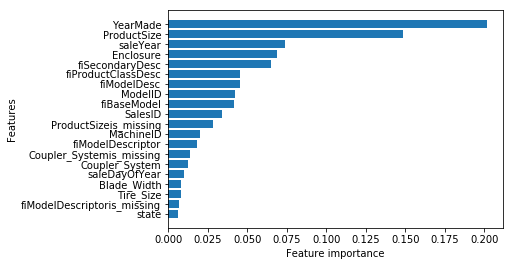

In [145]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [146]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


**What other machine learning model could we try on our dataset??** eg CatBoost.ai or XGBoost.ai